In [423]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

In [424]:
np.random.RandomState(seed=42)

RandomState(MT19937) at 0x30C8D8140

In [425]:
def log_loss(w, X, y):
    m = X.shape[1]
    z = np.dot(w.T, X)
    A = 1 / (1 + np.exp(-z))
    loss = -(1/m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    dz = A - y
    grad = (1/m) * np.dot(X, dz.T)
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)
    return w, losses

def predict(w, X, b=0.5):
    z = np.dot(w.T, X)
    A = 1 / (1 + np.exp(-z))
    y_predicted = (A >= b).astype(int)
    return y_predicted

In [427]:
classes = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=4)

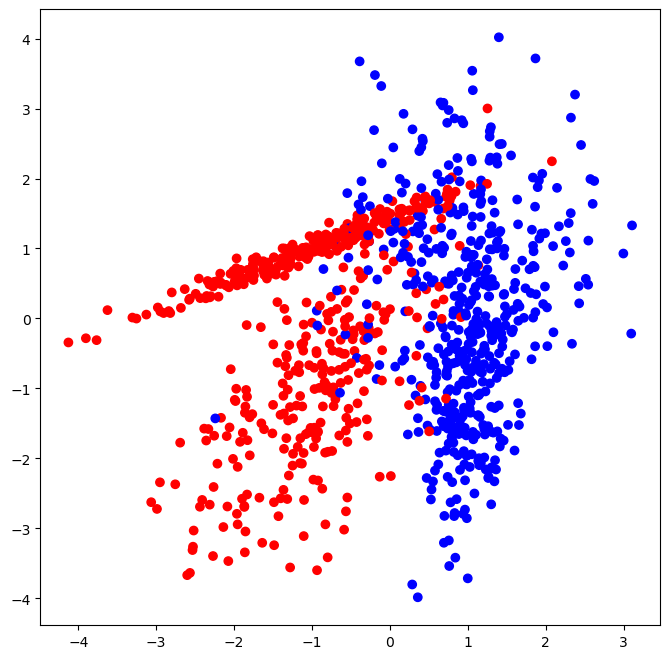

In [428]:
colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [429]:
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

print("Размер массива признаков обучающей выборки", X_train.shape)
print("Размер массива признаков тестовой выборки", X_test.shape)
print("Размер массива ответов для обучающей выборки", y_train.shape)
print("Размер массива ответов для тестовой выборки", y_test.shape)

Размер массива признаков обучающей выборки (700, 2)
Размер массива признаков тестовой выборки (300, 2)
Размер массива ответов для обучающей выборки (700,)
Размер массива ответов для тестовой выборки (300,)


In [430]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [431]:
w0 = np.zeros((X_train_tr.shape[0], 1))

In [432]:
w0.shape

(2, 1)

In [433]:
X_train_tr.shape

(2, 700)

In [434]:
n_iterations = 1000
eta = 0.01

In [435]:
w_opt, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

In [436]:
y_pred = predict(w_opt, X_test_tr)
accuracy = np.mean(y_pred == y_test)

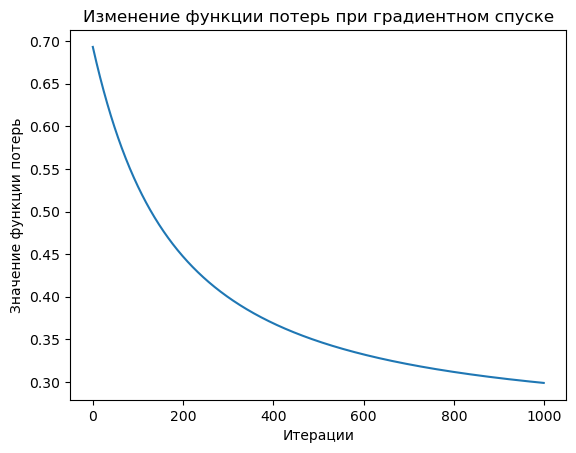

In [437]:
plt.plot(losses)
plt.xlabel('Итерации')
plt.ylabel('Значение функции потерь')
plt.title('Изменение функции потерь при градиентном спуске')
plt.show()

In [438]:
print(f'Точность: {accuracy:.2f}')

Точность: 0.90


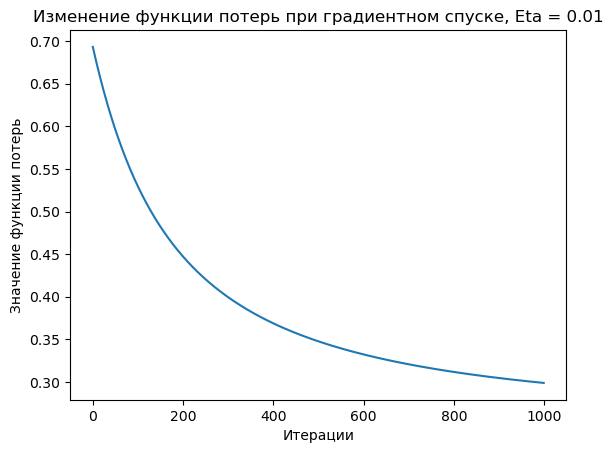

Точность: 0.90


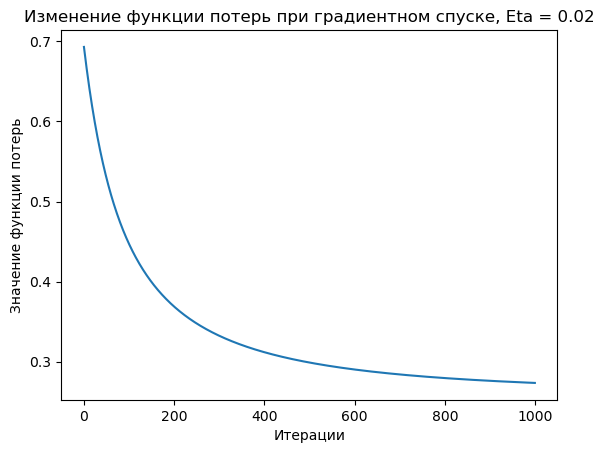

Точность: 0.90


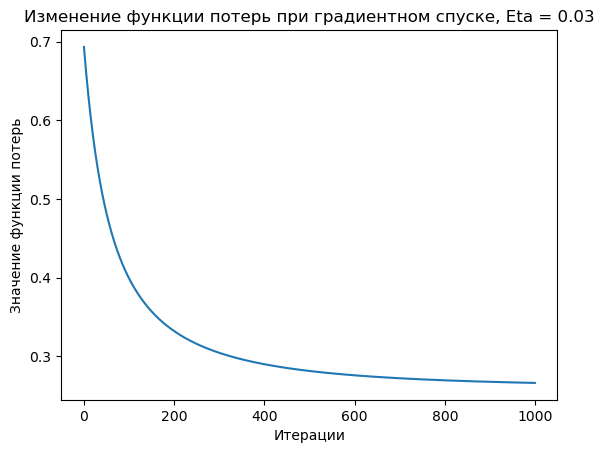

Точность: 0.90


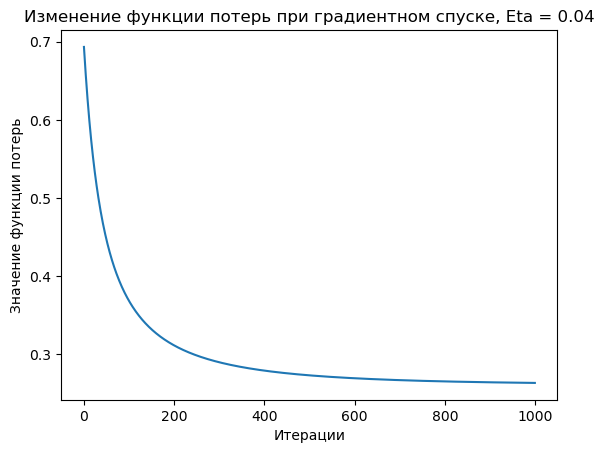

Точность: 0.90


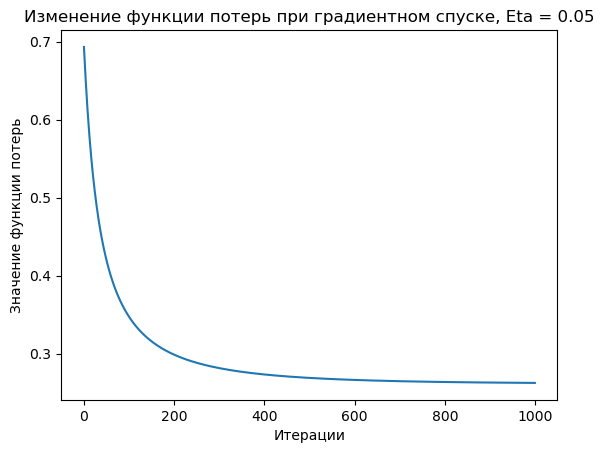

Точность: 0.90


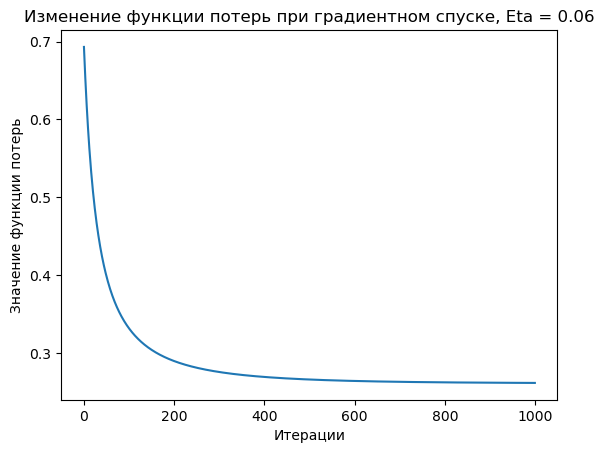

Точность: 0.90


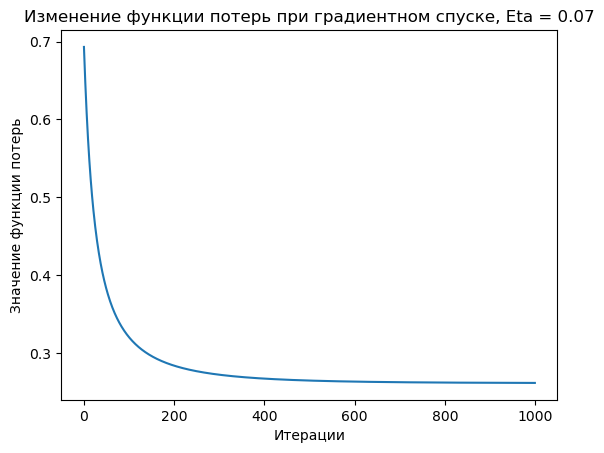

Точность: 0.90


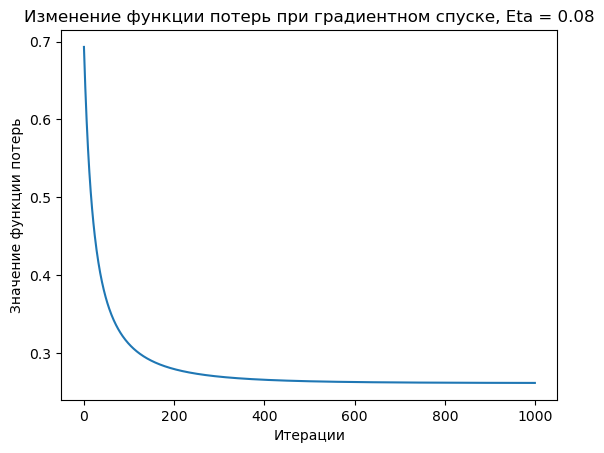

Точность: 0.90


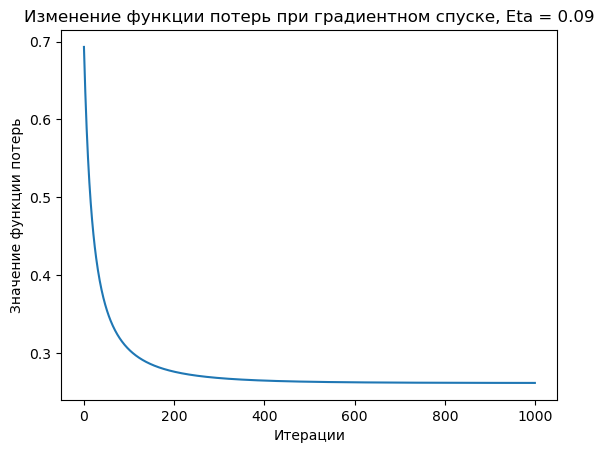

Точность: 0.90


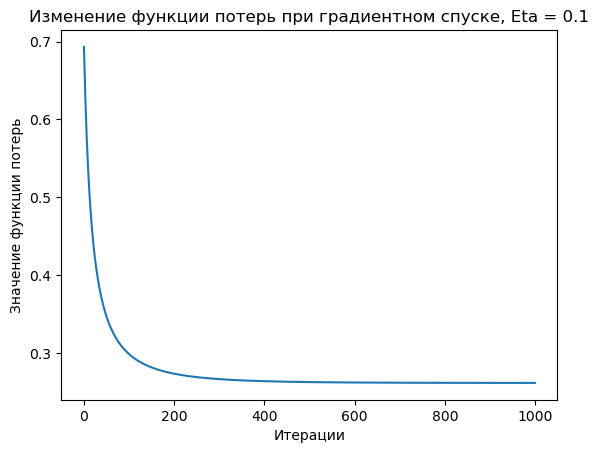

Точность: 0.90


In [439]:
for eta in [0.01 * i for i in range(1, 11)]:
    w0 = np.zeros((X_train_tr.shape[0], 1))
    w_opt, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)
    y_pred = predict(w_opt, X_test_tr)
    accuracy = np.mean(y_pred == y_test)
    plt.figure()
    plt.plot(losses)
    plt.xlabel('Итерации')
    plt.ylabel('Значение функции потерь')
    plt.title(f'Изменение функции потерь при градиентном спуске, Eta = {eta}')
    plt.show()
    print(f'Точность: {accuracy:.2f}')

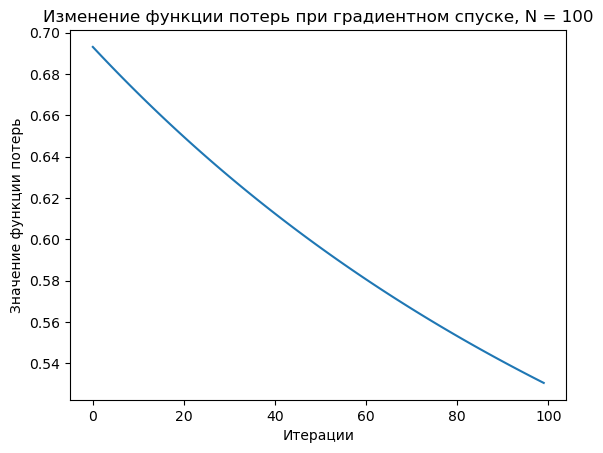

Точность: 0.90


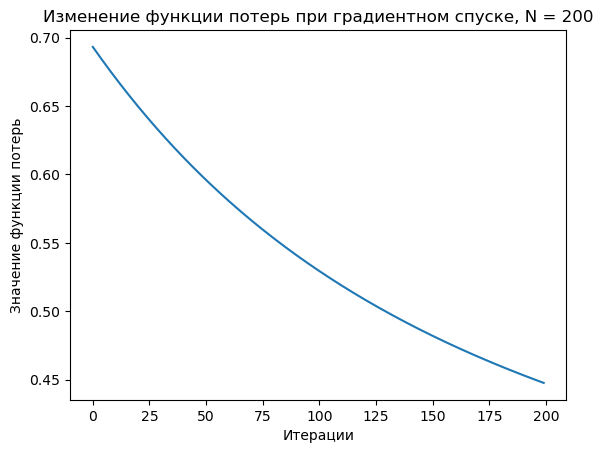

Точность: 0.90


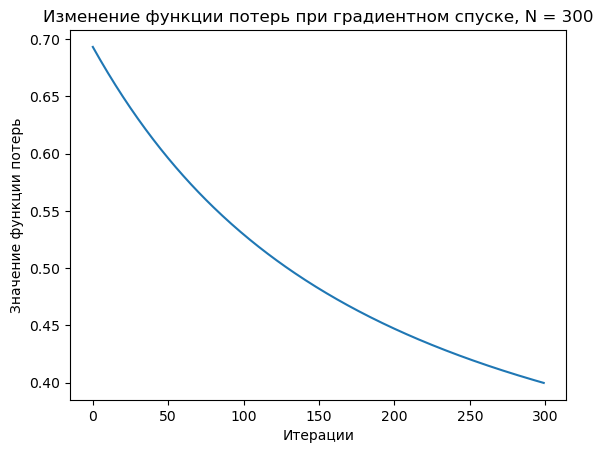

Точность: 0.90


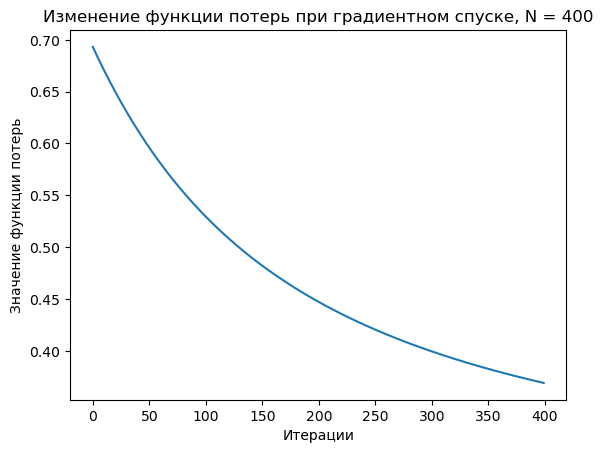

Точность: 0.90


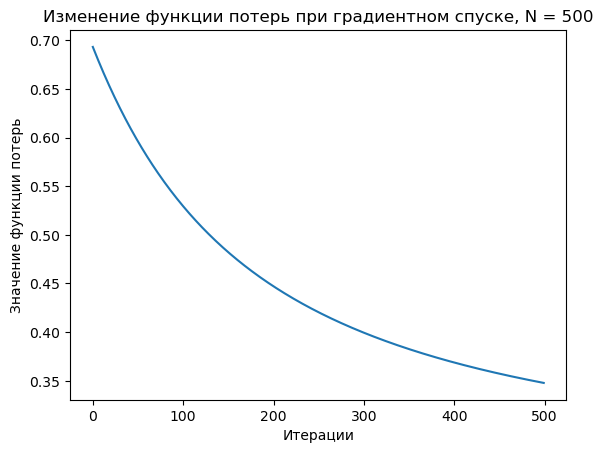

Точность: 0.90


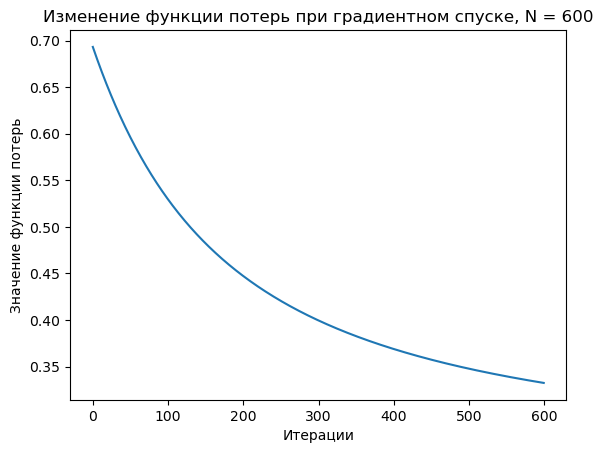

Точность: 0.90


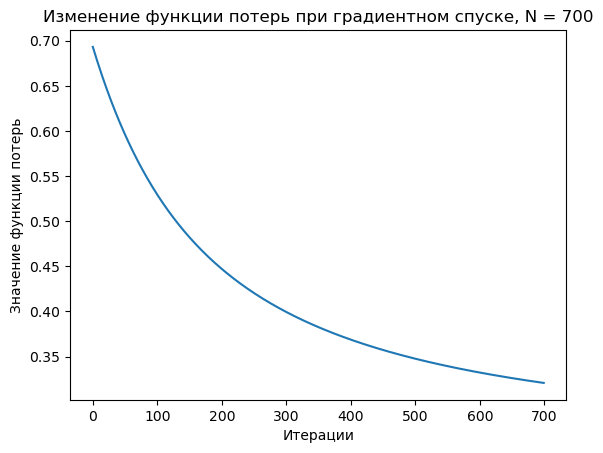

Точность: 0.90


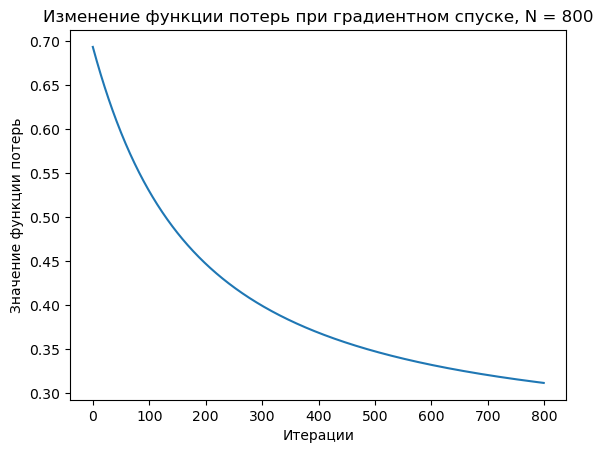

Точность: 0.90


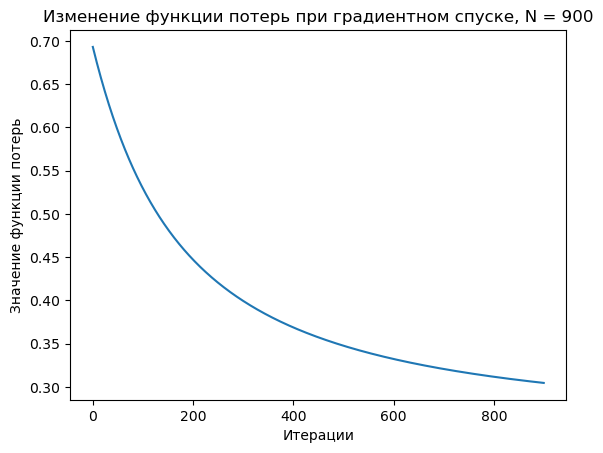

Точность: 0.90


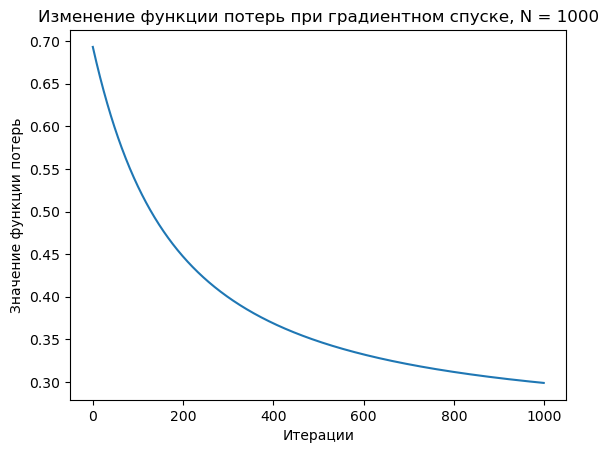

Точность: 0.90


In [440]:
for n_iterations in [100 * i for i in range(1, 11)]:
    eta = 0.01
    w0 = np.zeros((X_train_tr.shape[0], 1))
    w_opt, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)
    y_pred = predict(w_opt, X_test_tr)
    accuracy = np.mean(y_pred == y_test)
    plt.figure()
    plt.plot(losses)
    plt.xlabel('Итерации')
    plt.ylabel('Значение функции потерь')
    plt.title(f'Изменение функции потерь при градиентном спуске, N = {n_iterations}')
    plt.show()
    print(f'Точность: {accuracy:.2f}')

**Ответы на дополнительные вопросы:**
1. Шаг (eta) влияет на скорость сходимости. Слишком малый шаг приводит к медленной сходимости, слишком большой шаг может вызвать расхождение.
2. Слишком малое число итераций может привести к недообучению, слишком большое - к переобучению.
3. Логистическая регрессия подходит для бинарной классификации, так как моделирует вероятность принадлежности к одному из двух классов через сигмоидную функцию. Для многоклассовой задачи используется softmax-регрессия.